In [3]:
labels=['down','go','left','no','right','stop','up','yes']

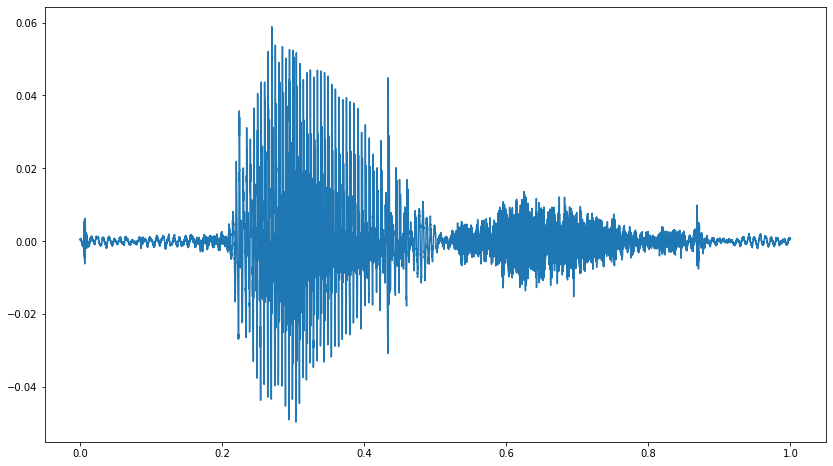

In [4]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
path='C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData/mini_speech_commands/yes/'
samples,sample_rate=librosa.load(path+'00f0204f_nohash_0.wav',sr=16000)
fig=plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,sample_rate/len(samples),sample_rate),samples)


(array([   8.,    8.,   19.,   35.,   42.,  101.,   87.,  135.,  190.,
        6661.]),
 array([0.4266875 , 0.48401875, 0.54135   , 0.59868125, 0.6560125 ,
        0.71334375, 0.770675  , 0.82800625, 0.8853375 , 0.94266875,
        1.        ]),
 <BarContainer object of 10 artists>)

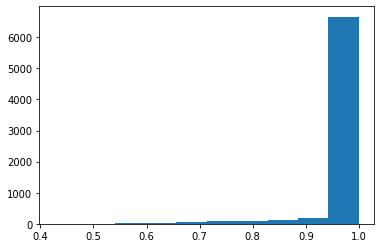

In [4]:
import os
from scipy.io import wavfile
train_audio_path='C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData/mini_speech_commands'
duration_of_recordings=[]
for label in labels:
    waves=[f for f in os.listdir(train_audio_path+'/'+label) if(f.endswith('.wav'))]
    for wav in waves:
        sample_rate,samples=wavfile.read(train_audio_path+'/'+label+'/'+wav)
        
        duration_of_recordings.append(float(len(samples)/sample_rate))
plt.hist(np.array(duration_of_recordings))
        

In [3]:
len(samples)

22050

In [5]:
import os
from tqdm import tqdm
duration_of_recordings_after=[]
all_wave=[]
all_label=[]
train_audio_path='C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData/mini_speech_commands'
for label in tqdm(labels):
    waves=[f for f in os.listdir(train_audio_path+'/'+label) if(f.endswith('.wav'))]
    for wav in waves:
        samples,sample_rate=librosa.load(train_audio_path+'/'+label+'/'+wav,sr=16000)
        samples=librosa.resample(samples,sample_rate,8000)
        if(len(samples)==8000):
            all_wave.append(samples)
            all_label.append(label)
            duration_of_recordings_after.append(float(len(samples)/sample_rate))


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [06:24<00:00, 48.07s/it]


In [8]:
print(np.array(all_wave).shape)

(6527, 8000)


In [18]:
from sklearn.preprocessing import LabelEncoder
print(all_label)
le=LabelEncoder()
y=le.fit_transform(all_label)
print(y)
classes=list(le.classes_)

['down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down',

In [19]:
from keras.utils import np_utils
y=np_utils.to_categorical(y,num_classes=len(labels))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [20]:
from numpy import array
print(np.array(all_wave).shape)
print(np.array(y).shape)

(6527, 8000)
(6527, 8)


In [21]:
all_wave_n=np.array(all_wave).reshape(-1,8000,1)
print(array(all_wave_n))

[[[-3.0699887e-03]
  [-4.1080755e-03]
  [-3.3103621e-03]
  ...
  [-4.6780393e-03]
  [-4.2148884e-03]
  [-6.1005345e-03]]

 [[ 1.2677514e-03]
  [ 1.3883972e-03]
  [ 1.5234093e-04]
  ...
  [ 1.4848108e-03]
  [-2.9608952e-03]
  [-5.0569242e-03]]

 [[ 5.7420129e-04]
  [ 8.4022258e-04]
  [ 8.9549506e-04]
  ...
  [ 8.3368819e-04]
  [ 6.6108082e-04]
  [ 6.7355536e-04]]

 ...

 [[-2.5810974e-03]
  [-5.7229004e-03]
  [-9.6035451e-03]
  ...
  [-7.0707067e-03]
  [-1.9237734e-03]
  [-3.5292644e-03]]

 [[-1.3979111e-03]
  [-2.6279530e-03]
  [-3.4373945e-03]
  ...
  [ 9.5483684e-04]
  [ 3.6913110e-04]
  [ 2.5656153e-04]]

 [[-1.8530698e-05]
  [-1.7116408e-05]
  [-1.5449716e-04]
  ...
  [ 2.0603633e-04]
  [ 1.4838617e-04]
  [ 3.0142363e-04]]]


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(np.array(all_wave_n),np.array(y),test_size=0.1)

print(x_train.shape), 
print(y_train.shape)

print(x_test.shape), 
print(y_test.shape)


(5874, 8000, 1)
(5874, 8)
(653, 8000, 1)
(653, 8)


In [23]:
from sklearn.model_selection import train_test_split


x_train, x_valid,y_train, y_valid = train_test_split(x_train,y_train,train_size=0.8)

print(x_train.shape),
print(y_train.shape)

print(x_valid.shape),
print(y_valid.shape)

(4699, 8000, 1)
(4699, 8)
(1175, 8000, 1)
(1175, 8)


In [24]:
from keras.layers import Flatten,Dropout,Input,MaxPooling1D,Conv1D,Dense
from keras.models import Model
input = Input(shape=(8000,1))

conv=Conv1D(8,13,padding='valid',activation='relu',strides=1)(input)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv=Conv1D(16,11,padding='valid',activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv=Conv1D(32,9,padding='valid',activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)

conv=Conv1D(64,7,padding='valid',activation='relu',strides=1)(conv)
conv=MaxPooling1D(3)(conv)
conv=Dropout(0.3)(conv)


conv=Flatten()(conv)

conv=Dense(256,activation='relu')(conv)
conv=Dropout(0.3)(conv)

conv=Dense(128,activation='relu')(conv)
conv=Dropout(0.3)(conv)


output=Dense(len(labels),activation='softmax')(conv)
conv=Dropout(0.3)(conv)

model=Model(input,output)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model

In [26]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=10, min_delta=0.0001)   

#verbose=0 shows nothing
#verbose=1 shows a progress bar and epoch numbers
#verbose=2 shows only epoch numbers

#patience indicates as soon as the performence measure gets worse from one epoch to the next then the training is terminated. 
#but as the model's performence is noisy it might go up or down from each epoch to next.so we set some value,here patience=10 
#in this model the training will terminate only if there is no improvement in the performence measure for 10 epochs

#min_delta defines what qualifies as an improvement in monitored performence measure
#as min_delta is set to 0.0001 that means the validation_loss has to improve by at least 0.0001
#if the validation_loss improved by a small amount say by 0.00001 then it would be consider as worsening the performence and patience counter would be increase by 1
#by default it is set to 0 that means any improvement is enough to reset the patience

#mode=auto which means the direction autometically inferred by the quantity name, if the model is monitoring the loss then the direction will go down and in case of accuracy direction of improvement goes up 
#mode=min which means we want to minimize the performance measure which is validation_loss
#mode=max which means we want to maximize the performance measure which is validation_accuracy

checkpoint = ModelCheckpoint('speech2text_modelnf.hdf5', monitor='val_acc', 
                             verbose=1, save_best_only=True, mode='max')

In [27]:
history2=model.fit(x_train, y_train ,epochs=100,callbacks=[early_stop,checkpoint], batch_size=32, validation_data=(x_valid,y_valid))

Epoch 1/100
147/147 [==============================] - 92s 426ms/step - loss: 2.0402 - accuracy: 0.1574 - val_loss: 1.8700 - val_accuracy: 0.2417
Epoch 2/100
147/147 [==============================] - 63s 430ms/step - loss: 1.8066 - accuracy: 0.2918 - val_loss: 1.6967 - val_accuracy: 0.3387
Epoch 3/100
147/147 [==============================] - 76s 519ms/step - loss: 1.6437 - accuracy: 0.3634 - val_loss: 1.4991 - val_accuracy: 0.4187
Epoch 4/100
147/147 [==============================] - 70s 477ms/step - loss: 1.4850 - accuracy: 0.4263 - val_loss: 1.3406 - val_accuracy: 0.4740
Epoch 5/100
147/147 [==============================] - 74s 502ms/step - loss: 1.3581 - accuracy: 0.4821 - val_loss: 1.2338 - val_accuracy: 0.5379
Epoch 6/100
147/147 [==============================] - 66s 452ms/step - loss: 1.2410 - accuracy: 0.5123 - val_loss: 1.2223 - val_accuracy: 0.5243
Epoch 7/100
147/147 [==============================] - 66s 451ms/step - loss: 1.1131 - accuracy: 0.5797 - val_loss: 1.0481 -

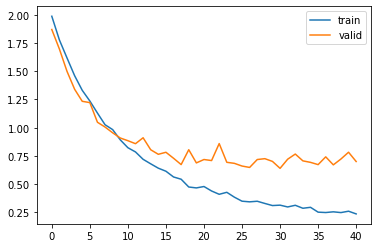

In [28]:
plt.plot(history2.history['loss'],label='train')
plt.plot(history2.history['val_loss'],label='valid')
plt.legend()
plt.show()

In [29]:
print("Evaluate on Test Data")
results=model.evaluate(x_test,y_test,batch_size=32)
print("test_loss,test_acc: ",results)

print("Generate predictions for 653 samples: ")
predictions=model.predict(x_test[:653])

Evaluate on Test Data
21/21 [==============================] - 2s 103ms/step - loss: 0.8208 - accuracy: 0.7871
test_loss,test_acc:  [0.8208116888999939, 0.7871363162994385]
Generate predictions for 653 samples: 


In [30]:
model.save('C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData/mini_speech_commands/speech2text_modelnf.hdf5')

In [31]:
from keras.models import load_model
model = load_model('C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData/mini_speech_commands/speech2text_modelnf.hdf5')

In [35]:
def predict(audio,shape_num=8000):
    prob=model.predict(audio.reshape(-1,shape_num,1))
    index=np.argmax(prob[0])
    return classes[index]

In [75]:
import random
index=random.randint(0,len(x_valid)-1)
samples=x_valid[index].ravel()
print("Audio:",classes[np.argmax(y_valid[index])])
ipd.Audio(samples, rate=8000)

Audio: left


In [76]:
print("Text:",predict(samples))

Text: left


In [109]:
import random
import noisereduce as nr
index=random.randint(0,len(x_test)-1)
samples=x_test[index].ravel()
print("Audio:",classes[np.argmax(y_test[index])])
ipd.Audio(samples, rate=16000)

Audio: left


In [110]:
print("Text:",predict(samples))

Text: left


In [118]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000
duration = 1 # seconds
filename = 'C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData/stop21.wav' 
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1,blocking=True) 
print("end") 
sd.wait() 
sf.write(filename, mydata, samplerate)

start
end


In [119]:
os.listdir('C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData')
filepath='C:/Users/Parama/AppData/Local/Programs/Python/Python39/MiniData'

In [122]:
samples, sample_rate = librosa.load(filepath + '/' + 'stop21.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)

  0%|          | 0/7 [00:00<?, ?it/s]

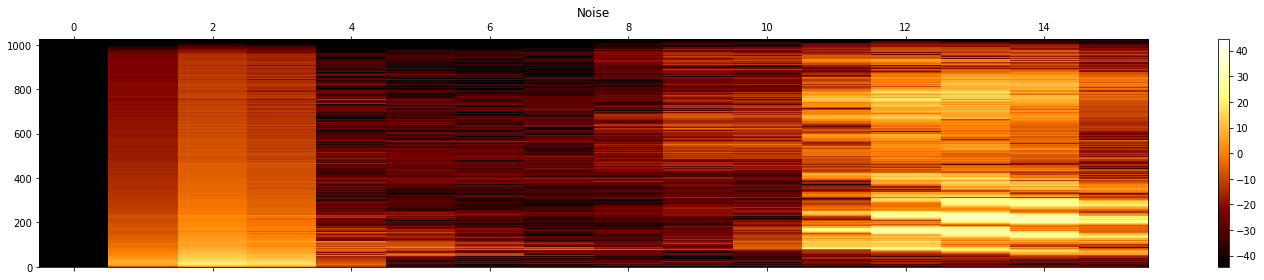

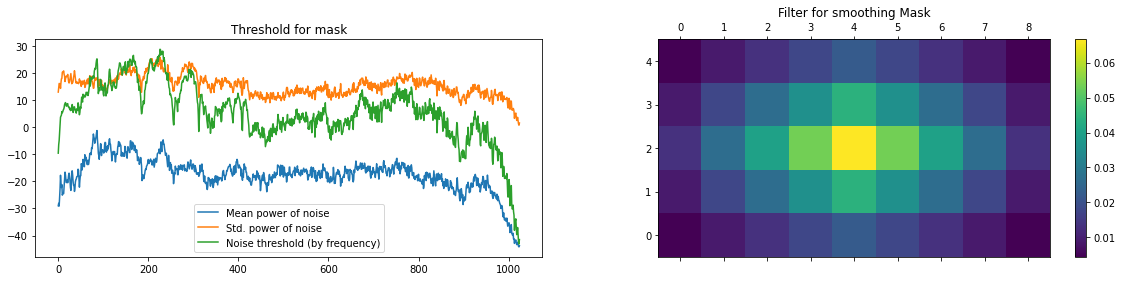

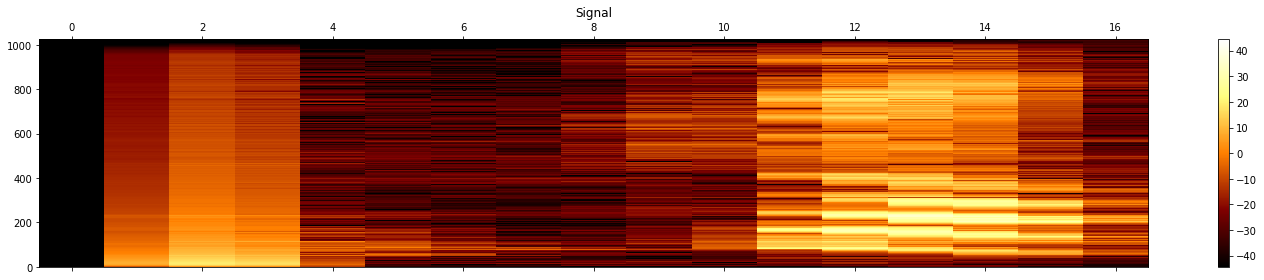

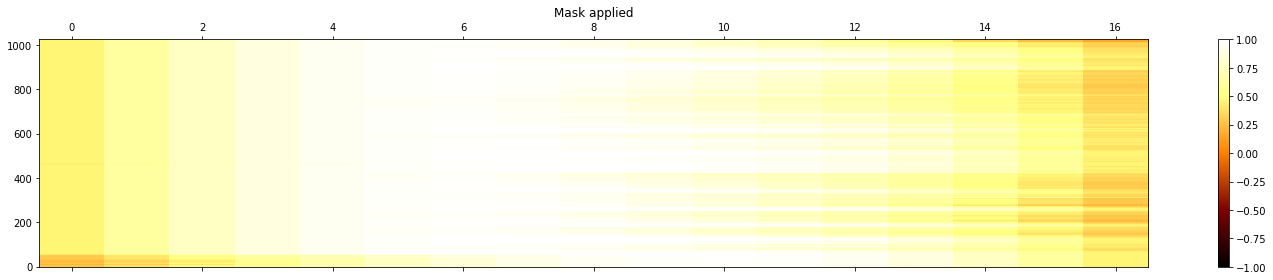

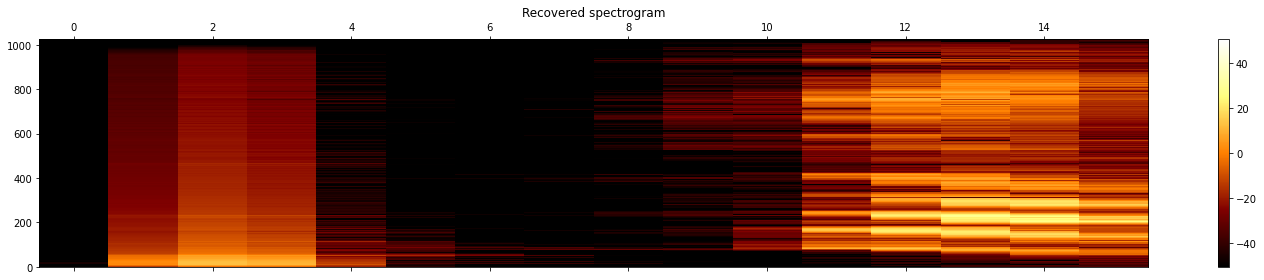

In [129]:
import noisereduce as nr
data,rate=librosa.load(filepath+'/'+'stop21.wav',sr=8000)
noisy_part=data[0:8000]
reduced_noise=nr.reduce_noise(audio_clip=data,noise_clip=noisy_part,verbose=True)

In [127]:
import IPython.display as ipd
ipd.Audio(data=reduced_noise,rate=rate)

In [128]:
predict(data)

'stop'